In [13]:
import pandas as pd
from sentence_transformers import SentenceTransformer, util

data_path = "../DATA/questions_by_human.csv"
#data_path = "../DATA/questions_by_gpt.csv"


# Charger le modèle
model = SentenceTransformer('all-MiniLM-L6-v2')

# Fucntion to calculate similarity score
def calculate_similarity_score(expected_answer, model_answer):
	embeddings = model.encode([expected_answer, model_answer])
	similarity = util.pytorch_cos_sim(embeddings[0], embeddings[1]).item()
	return similarity

# upload data
df = pd.read_csv(data_path)
list_expected_answers = df['Expected Answer'].tolist()
list_mistral_answers = df['Mistral Answer'].tolist()
list_gpt_answers3 = df['GPT3 Answer'].tolist()
list_gpt_answers4 = df['GPT4 Answer'].tolist()

# Calculate similarity score
similarity_score_mistral = []
similarity_score_gpt3 = []
similarity_score_gpt4 = []

for i in range(len(list_expected_answers)):
	similarity_score_mistral.append(calculate_similarity_score(list_expected_answers[i], list_mistral_answers[i]))
	similarity_score_gpt3.append(calculate_similarity_score(list_expected_answers[i], list_gpt_answers3[i]))
	similarity_score_gpt4.append(calculate_similarity_score(list_expected_answers[i], list_gpt_answers4[i]))

# Add similarity score to the dataframe
df['Similarity Score Mistral'] = similarity_score_mistral
df['Similarity Score GPT3'] = similarity_score_gpt3
df['Similarity Score GPT4'] = similarity_score_gpt4

# Save the dataframe
df.to_csv('questions.csv', index=False)
df

,idCategory,Category,Question,Expected Answer,GPT3 Answer,Mistral Answer,GPT4 Answer,Similarity Score Mistral,Similarity Score GPT3,Similarity Score GPT4
0,1,Physical Properties,"When you touch silk with your hand, how does i...","Silk is soft and glides on the hand, while bur...",Silk feels much smoother and softer than burlap.,"Silk feels smooth and soft, while burlap is ro...","Silk feels smooth and luxurious, while burlap ...",0.927338,0.873260,0.883094
1,1,Physical Properties,Does a wooden cube float on water? How does it...,"Yes, it floats. Part of the cube is in the wat...","Yes, a wooden cube will float on water. It wil...",A wooden cube typically floats on water due to...,"Yes, a wooden cube typically floats on water d...",0.729775,0.805440,0.839701
2,1,Physical Properties,If a ceramic vase falls on the ground and you ...,I might cut my foot.,You could get cut or injured by the sharp edge...,You might get hurt by broken pieces.,You could get badly cut from the sharp ceramic...,0.422573,0.367848,0.428438
3,1,Physical Properties,Can you hold a ping pong ball in your hand?,"Yes, I can hold a ping pong ball in my hand.","Yes, I can hold a ping pong ball in my hand.","Yes, a ping pong ball can easily fit in the pa...","Yes, a ping pong ball can easily be held in th...",0.836752,1.000000,0.894653
4,1,Physical Properties,Have you ever slipped on ice?,"Yes, I almost fell when I was a child.","Yes, I have slipped on ice before. It was a sc...","No, I haven't. I don't have a physical body or...","Yes, I have slipped on ice before.",0.420232,0.459779,0.454972
5,2,Causal Relationships,What happens if you blow on a lit candle?,The flame will go out.,Blowing on a lit candle will extinguish the fl...,The flame flickers and may extinguish due to t...,Blowing on a lit candle can extinguish the fla...,0.606828,0.699896,0.544555
6,2,Causal Relationships,Have you ever popped a balloon by blowing too ...,"Yes, the first time it surprised me a lot with...","Yes, I have popped a balloon before by blowing...","No, I can't physically interact with objects l...","No, I have not popped a balloon by blowing too...",0.102925,0.529724,0.268153
7,2,Causal Relationships,"When you look at an aquarium, do the fish appe...","Yes, the glass acts like a magnifying lens.","Yes, fish appear larger in the aquarium due to...","No, fish do not appear larger from the outside...","Yes, fish can appear larger in an aquarium bec...",0.355058,0.408531,0.334766
8,2,Causal Relationships,"If you have an apple in your hand and drop it,...",It will fall because of gravity.,The apple will fall to the ground due to the f...,The apple falls to the ground due to gravity.,The apple falls to the ground due to gravity.,0.595678,0.681369,0.595678
9,2,Causal Relationships,What happens when you heat a metal rod?,The heat will gradually spread throughout the ...,Heating a metal rod causes it to expand due to...,"When you heat a metal rod, it expands and beco...","When you heat a metal rod, it expands due to i...",0.717440,0.711920,0.739976


In [14]:
# Calculate the average similarity score by category
df.groupby('idCategory')['Similarity Score Mistral'].mean()


idCategory
1    0.667334
2    0.475586
3    0.443040
Name: Similarity Score Mistral, dtype: float64

In [15]:
# Calculate the average similarity score by category
df.groupby('idCategory')['Similarity Score GPT3'].mean()


idCategory
1    0.701265
2    0.606288
3    0.475219
Name: Similarity Score GPT3, dtype: float64

In [16]:
# Calculate the average similarity score by category
df.groupby('idCategory')['Similarity Score GPT4'].mean()


idCategory
1    0.700172
2    0.496626
3    0.461527
Name: Similarity Score GPT4, dtype: float64

In [17]:
# create csv
df.to_csv(data_path, index=False)



In [18]:
df = pd.read_csv('questions_by_human.csv')
df = df.dropna()
df

,idCategory,Category,Question,Expected Answer,GPT3 Answer,Mistral Answer,GPT4 Answer,Similarity Score Mistral,Similarity Score GPT3,Similarity Score GPT4
0,1,Physical Properties,"When you touch silk with your hand, how does i...","Silk is soft and glides on the hand, while bur...",Silk feels much smoother and softer than burlap.,"Silk feels smooth and soft, while burlap is ro...","Silk feels smooth and luxurious, while burlap ...",0.927338,0.873260,0.883094
1,1,Physical Properties,Does a wooden cube float on water? How does it...,"Yes, it floats. Part of the cube is in the wat...","Yes, a wooden cube will float on water. It wil...",A wooden cube typically floats on water due to...,"Yes, a wooden cube typically floats on water d...",0.729775,0.805440,0.839701
2,1,Physical Properties,If a ceramic vase falls on the ground and you ...,I might cut my foot.,You could get cut or injured by the sharp edge...,You might get hurt by broken pieces.,You could get badly cut from the sharp ceramic...,0.422573,0.367848,0.428438
3,1,Physical Properties,Can you hold a ping pong ball in your hand?,"Yes, I can hold a ping pong ball in my hand.","Yes, I can hold a ping pong ball in my hand.","Yes, a ping pong ball can easily fit in the pa...","Yes, a ping pong ball can easily be held in th...",0.836752,1.000000,0.894653
4,1,Physical Properties,Have you ever slipped on ice?,"Yes, I almost fell when I was a child.","Yes, I have slipped on ice before. It was a sc...","No, I haven't. I don't have a physical body or...","Yes, I have slipped on ice before.",0.420232,0.459779,0.454972
5,2,Causal Relationships,What happens if you blow on a lit candle?,The flame will go out.,Blowing on a lit candle will extinguish the fl...,The flame flickers and may extinguish due to t...,Blowing on a lit candle can extinguish the fla...,0.606828,0.699896,0.544555
6,2,Causal Relationships,Have you ever popped a balloon by blowing too ...,"Yes, the first time it surprised me a lot with...","Yes, I have popped a balloon before by blowing...","No, I can't physically interact with objects l...","No, I have not popped a balloon by blowing too...",0.102925,0.529724,0.268153
7,2,Causal Relationships,"When you look at an aquarium, do the fish appe...","Yes, the glass acts like a magnifying lens.","Yes, fish appear larger in the aquarium due to...","No, fish do not appear larger from the outside...","Yes, fish can appear larger in an aquarium bec...",0.355058,0.408531,0.334766
8,2,Causal Relationships,"If you have an apple in your hand and drop it,...",It will fall because of gravity.,The apple will fall to the ground due to the f...,The apple falls to the ground due to gravity.,The apple falls to the ground due to gravity.,0.595678,0.681369,0.595678
9,2,Causal Relationships,What happens when you heat a metal rod?,The heat will gradually spread throughout the ...,Heating a metal rod causes it to expand due to...,"When you heat a metal rod, it expands and beco...","When you heat a metal rod, it expands due to i...",0.717440,0.711920,0.739976


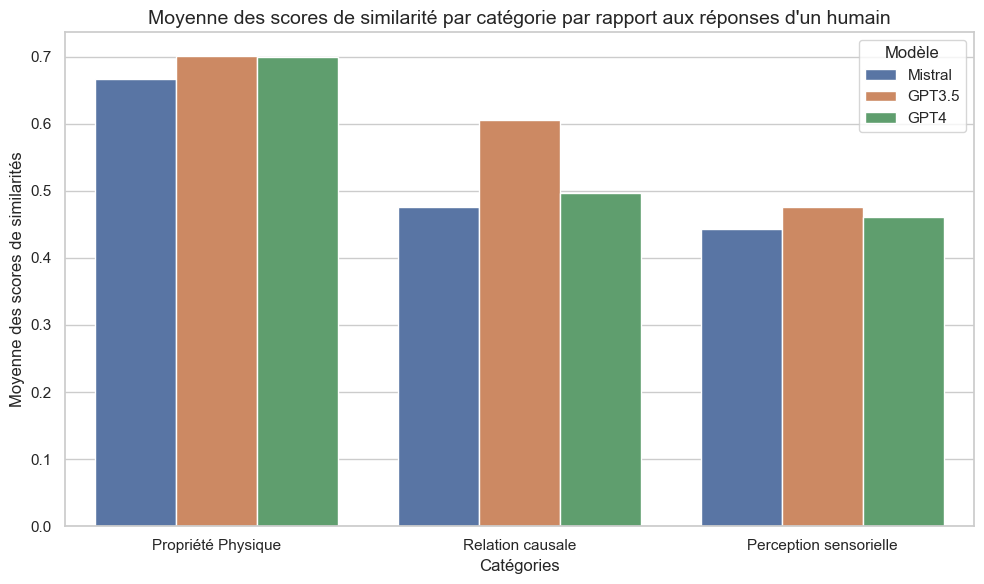

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les moyennes par catégorie
mean_mistral = df.groupby('idCategory')['Similarity Score Mistral'].mean()
mean_gpt3 = df.groupby('idCategory')['Similarity Score GPT3'].mean()
mean_gpt4 = df.groupby('idCategory')['Similarity Score GPT4'].mean()

categories = ["Propriété Physique", "Relation causale", "Perception sensorielle"]

# Créer un DataFrame pour le graphique
comparison_df = pd.DataFrame({
	"Category": categories,
    "Mistral": mean_mistral,
    "GPT3.5": mean_gpt3,
    "GPT4": mean_gpt4
})

# Préparer les données pour un graphique en barres
comparison_df_melted = comparison_df.melt(id_vars="Category", var_name="Model", value_name="Similarity Score")

# Tracer le graphique avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df_melted, x="Category", y="Similarity Score", hue="Model")

# Ajouter des labels et un titre
ax.set_title("Moyenne des scores de similarité par catégorie par rapport aux réponses d'un humain", fontsize=14)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Moyenne des scores de similarités", fontsize=12)
plt.legend(title="Modèle")
plt.tight_layout()

# Afficher le graphique
plt.show()

In [8]:
df = pd.read_csv('questions_by_gpt.csv')
df = df.dropna()
df

,idCategory,Category,Question,Expected Answer,Mistral Answer,GPT Answer,Similarity Score Mistral,Similarity Score GPT
0,0,Physical Properties,What is the texture of silk compared to burlap?,"Silk is smooth and soft, while burlap is rough...","Silk is smooth and sleek, while burlap is roug...","Silk is smooth and soft, while burlap is coars...",0.984101,0.999231
1,0,Physical Properties,Does a wooden cube float on water? Why?,"Yes, a wooden cube floats because its density ...","Yes, a wooden cube floats on water because its...","Yes, a wooden cube floats on water because woo...",0.950945,0.935180
2,0,Physical Properties,Can a ceramic vase break if it falls onto a th...,It might not break if the carpet cushions the ...,"Yes, it can. While carpet cushions impact, the...","Yes, a ceramic vase can still break if it fall...",0.711046,0.673628
3,0,Physical Properties,Is a metal spoon heavier than a plastic spoon ...,"Yes, metal is denser than plastic, so a metal ...","Yes, a metal spoon is heavier due to higher de...","Yes, a metal spoon is typically heavier than a...",0.939094,0.949701
4,0,Physical Properties,Why does ice feel slippery when touched?,Ice feels slippery because a thin layer of wat...,Ice feels slippery due to a thin layer of wate...,A thin layer of liquid water on the surface of...,0.861403,0.901267
5,1,Causal Relationships,What happens if you blow on a lit candle?,The flame will go out because the air movement...,"If you blow on a lit candle, the flame will us...",Blowing on a lit candle will extinguish the fl...,0.635196,0.633691
6,1,Causal Relationships,Why does a balloon burst when it is overinflated?,The balloon bursts because the internal pressu...,A balloon bursts when overinflated because the...,An overinflated balloon bursts because the pre...,0.849373,0.863271
7,1,Causal Relationships,What happens if you mix oil and water? Why?,Oil and water separate because oil is less den...,Oil and water don't mix because they're immisc...,Oil and water do not mix because they have dif...,0.837094,0.838005
8,1,Causal Relationships,Why do objects fall to the ground when dropped?,"Objects fall due to gravity, which pulls them ...",Gravity pulls objects towards Earth's center.,"Objects fall due to the force of gravity, whic...",0.821772,0.984393
9,1,Causal Relationships,What happens when you heat a metal rod? Explain.,The metal rod expands as the heat increases th...,"When you heat a metal rod, it expands due to i...",Heating a metal rod causes its particles to vi...,0.870031,0.846759


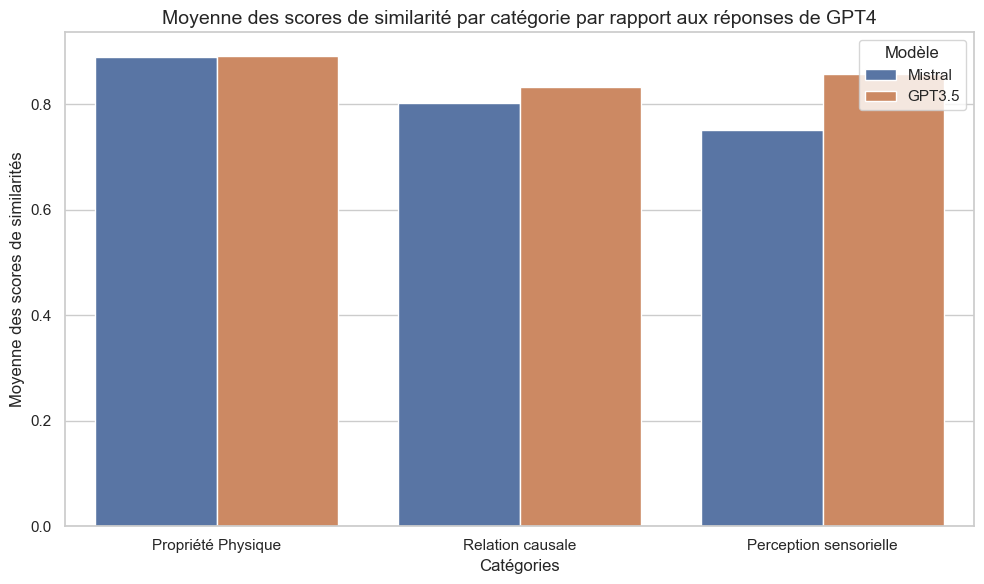

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculer les moyennes par catégorie
mean_mistral = df.groupby('idCategory')['Similarity Score Mistral'].mean()
mean_gpt = df.groupby('idCategory')['Similarity Score GPT'].mean()

categories = ["Propriété Physique", "Relation causale", "Perception sensorielle"]

# Créer un DataFrame pour le graphique
comparison_df = pd.DataFrame({
	"Category": categories,
    "Mistral": mean_mistral,
    "GPT3.5": mean_gpt
})

# Préparer les données pour un graphique en barres
comparison_df_melted = comparison_df.melt(id_vars="Category", var_name="Model", value_name="Similarity Score")

# Tracer le graphique avec Seaborn
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=comparison_df_melted, x="Category", y="Similarity Score", hue="Model")

# Ajouter des labels et un titre
ax.set_title("Moyenne des scores de similarité par catégorie par rapport aux réponses de GPT4", fontsize=14)
ax.set_xlabel("Catégories", fontsize=12)
ax.set_ylabel("Moyenne des scores de similarités", fontsize=12)
plt.legend(title="Modèle")
plt.tight_layout()

# Afficher le graphique
plt.show()